In [225]:
import pandas as pd
import numpy as np
from data_extraction import *
from datetime import datetime,timedelta

In [210]:
############ Evaluation #############

def MSE(df, method='ARIMA'):
    temp = df.copy()
    error = temp['grid-loss']-temp[method]
    squared= error**2
    mse = squared.mean()
    return mse
def MAE(df, method='ARIMA'):
    temp = df.copy()
    error = temp['grid-loss']-temp[method]
    absolute = abs(error)
    mae = absolute.mean()
    return mae

def MAPE(df, method='ARIMA'):
    temp = df.copy()
    mae = MAE(temp, method)
    return mae / temp['grid-loss'].mean()
    


In [211]:

ARIMA_forecast = pd.read_pickle('ARIMA_forecast.pkl')[['ARIMA']]
hybrid_forecast = pd.read_pickle('ANN_in_hybrid_forecast_80%.pkl')[['Hybrid']]
ANN_forecast = pd.read_pickle('ANN_alone_forecast.pkl')[['pred']]
ANN_forecast = ANN_forecast.rename(columns={'pred':'ANN'})
grid_loss = pd.read_pickle('ARIMA_forecast.pkl')[['grid-loss']]


In [212]:
table = grid_loss.join(ARIMA_forecast).join(ANN_forecast).join(hybrid_forecast).dropna()


In [213]:
EVALUATION_METRICS = ['MSE', 'MAE','MAPE']
METHODS = ['ARIMA','ANN','HYBRID']

MSE_ANN = MSE(table,'ANN')
MAE_ANN = MAE(table,'ANN')
MAPE_ANN = MAPE(table,'ANN')

ANN = [MSE_ANN,MAE_ANN,MAPE_ANN]

MSE_ARIMA = MSE(table,'ARIMA')
MAE_ARIMA = MAE(table,'ARIMA')
MAPE_ARIMA = MAPE(table,'ARIMA')

ARIMA = [MSE_ARIMA, MAE_ARIMA, MAPE_ARIMA]

MSE_HYBRID = MSE(table,'Hybrid')
MAE_HYBRID = MAE(table,'Hybrid')
MAPE_HYBRID = MAPE(table,'Hybrid')

HYBRID = [MSE_HYBRID,MAE_HYBRID,MAPE_HYBRID]




In [214]:
results = pd.DataFrame (index = EVALUATION_METRICS,columns=METHODS)

In [215]:
results['ARIMA'] = ARIMA
results['ANN'] = ANN
#results['HYBRID_50'] = HYBRID1
results['HYBRID'] =HYBRID2


In [216]:
improvement = [f"{round(100*(results['ARIMA'][metric]-results['HYBRID'][metric])/results['ARIMA'][metric],2)}%" for metric in EVALUATION_METRICS]
results['Hybrid improvement from ARIMA'] = improvement
results

,ARIMA,ANN,HYBRID,Hybrid improvement from ARIMA
MSE,28.113146,34.940505,26.359117,6.24%
MAE,3.920494,4.780441,3.776233,3.68%
MAPE,0.193728,0.236221,0.186599,3.68%


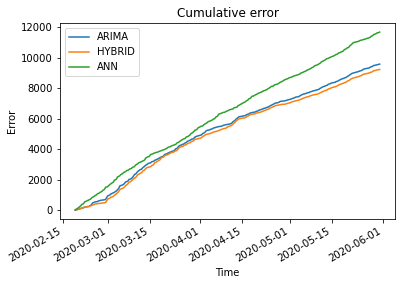

In [224]:
######## Cumulative sum plots ###########
cumerror = pd.DataFrame()

cumerror['ARIMA'] = abs(table['grid-loss'] - table['ARIMA']).cumsum()
cumerror['HYBRID'] = abs(table['grid-loss'] - table['Hybrid']).cumsum()
cumerror['ANN'] = abs(table['grid-loss'] - table['ANN']).cumsum()
plot = cumerror.plot(ylabel="Error",xlabel="Time", title="Cumulative error")
fig = plot.get_figure()
fig.savefig("Cumulative error")

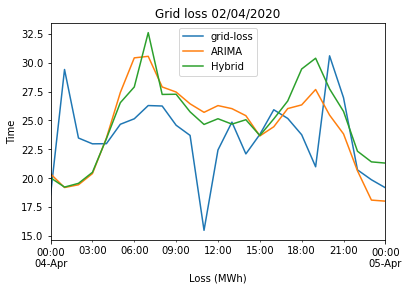

In [236]:
### Day plot ###
day = datetime(2020,4,4,0,0,0)
interval = timedelta(days=1)
plot = table[['grid-loss','ARIMA','Hybrid']].loc[day:day+interval].plot(title="Grid loss 02/04/2020",xlabel="Loss (MWh)", ylabel = "Time")
fig = plot.get_figure()
fig.savefig("One_day_plot")